In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras import layers
import pickle
from matplotlib import pyplot as plt
import PIL
import json
import os 
from pathlib import Path


In [2]:
tf.get_logger().setLevel('INFO')

In [3]:
img_files = os.listdir("woods_dataset")
images = list(Path("woods_dataset").joinpath("Test").glob('*_*.jpg'))
print(len(images))

0


In [4]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [5]:
h, w = 200, 200
batch_size = 64
help(tf.keras.utils.image_dataset_from_directory)

Help on function image_dataset_from_directory in module keras.utils.image_dataset:

image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)
    Generates a `tf.data.Dataset` from image files in a directory.
    
    If your directory structure is:
    
    ```
    main_directory/
    ...class_a/
    ......a_image_1.jpg
    ......a_image_2.jpg
    ...class_b/
    ......b_image_1.jpg
    ......b_image_2.jpg
    ```
    
    Then calling `image_dataset_from_directory(main_directory,
    labels='inferred')` will return a `tf.data.Dataset` that yields batches of
    images from the subdirectories `class_a` and `class_b`, together with labels
    0 and 1 (0 corresponding to `class_a` and 1 corresponding to `class_b`).
    
    Supported image formats: jpeg

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  Path("woods_dataset").joinpath("Train"),
  # label_mode="categorical",
  # validation_split=0.2,
  # subset="training",
  seed=1,
  image_size=(h, w),
  batch_size=batch_size).map(lambda x, y: (x / 255, y))

Found 5708 files belonging to 12 classes.
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-01-20 09:34:18.279692: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-20 09:34:18.280063: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
import itertools
from collections import Counter

class_weights = list(itertools.chain.from_iterable([k[1] for k in train_ds.as_numpy_iterator()]))
class_weights = Counter(class_weights)
class_weights = dict(sorted(class_weights.items(), key=lambda x: x[0]))
a = pd.DataFrame.from_dict(class_weights, orient="index").rename(columns={0:"train"})
a["perc"] = a["train"] / a["train"].sum() * 100
a

2023-01-20 09:34:19.100796: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


,train,perc
0,936,16.398038
1,440,7.708479
2,552,9.670638
3,504,8.829713
4,200,3.503854
5,1024,17.939734
6,400,7.007708
7,464,8.128942
8,432,7.568325
9,308,5.395936


In [10]:
# plt.imshow()
# next(train_ds.as_numpy_iterator())[0][0].astype(float).min()

In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  Path("woods_dataset").joinpath("Test"),
  # label_mode="categorical",
  # validation_split=0.2,
  # subset="validation",
  seed=1,
  image_size=(h, w),
  batch_size=batch_size).map(lambda x, y: (x / 255, y))

Found 2836 files belonging to 12 classes.


In [12]:
# import shutil
# for i in range(1, 13):
#     print(Path("woods_dataset").joinpath("Test", str(i)))
#     os.mkdir(Path("woods_dataset").joinpath("Test", str(i)))

In [13]:


# for i in images:
#     folder = str(i.absolute()).split("/")[-1].split("_")[1].split(".")[0].strip()
#     file_name = str(i.absolute()).split("/")[-1].strip()
#     print(Path("woods_dataset").joinpath("Test", file_name).absolute(), Path("woods_dataset").joinpath("Test", folder, file_name).absolute())
#     shutil.move(Path("woods_dataset").joinpath("Test", file_name).absolute(), Path("woods_dataset").joinpath("Test", folder, file_name).absolute())
    


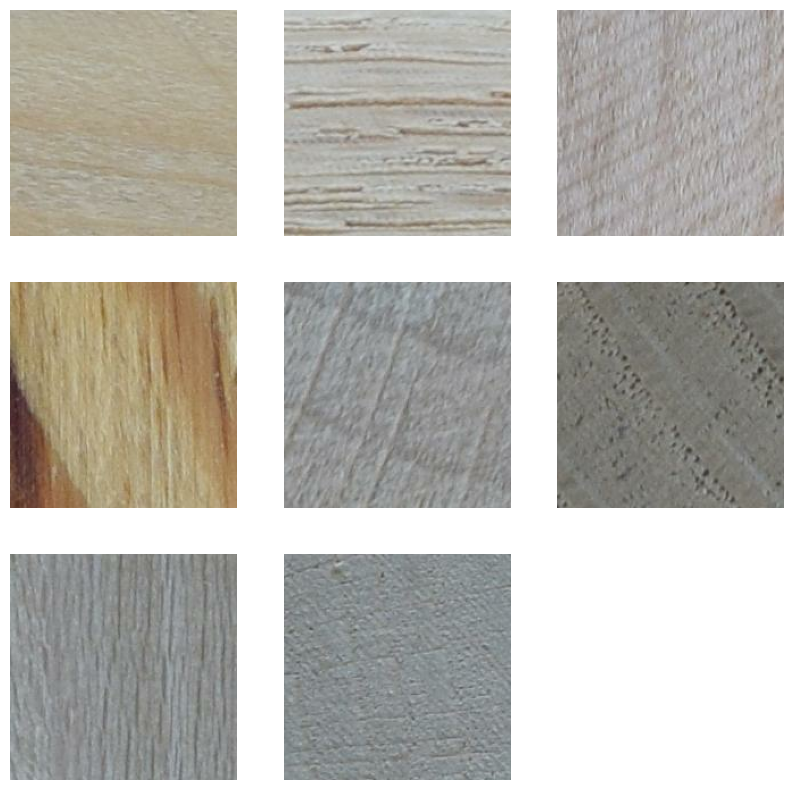

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("float"))
    # plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 200, 200, 3)
(64,)


In [16]:
# num_classes = len(class_names)
# layers.BatchNormalization

# model = Sequential([
#   layers.Rescaling(1./255, input_shape=(h, w, 3)),
#   # layers.Conv2D(8, 3, padding='same', activation='relu'),
#   # layers.MaxPooling2D(),
#   layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
#   layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
#   layers.BatchNormalization(),
#   layers.MaxPooling2D(),
#   # layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dropout(0.25),
#   layers.Dense(64, activation='relu'),
#   layers.Dense(32, activation='relu'),
#   layers.Flatten(),
#   layers.Dense(num_classes)
# ])

In [17]:

# model = Sequential([
#   # layers.Rescaling(1./255, input_shape=(h, w, 3)),
#   # layers.Conv2D(16, 3, padding='same', activation='relu'),
#   # layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(h, w, 3)),
#   layers.MaxPooling2D(),

#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),

#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   # layers.Dropout(0.2),

#   layers.Flatten(),
#   layers.Dense(256, activation='relu'),
#   # layers.Dense(64, activation='relu'),
#   layers.Dense(12, activation="softmax")
# ])

In [160]:

model = Sequential([
  # layers.Rescaling(1./255, input_shape=(h, w, 3)),
  # layers.Conv2D(16, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  layers.Conv2D(32, 4, padding='same', activation='relu', input_shape=(h, w, 3)),
  layers.MaxPooling2D(),

  # layers.Conv2D(64, 3, padding='valid', activation='relu'),
  # layers.MaxPooling2D(),

  layers.Conv2D(32, 4, padding='same', activation='relu'),
  # layers.Conv2D(64, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Dropout(0.2),

  # layers.Flatten(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(512, activation='relu'),
  # layers.Dense(256, activation='relu'),
  # layers.Dense(128, activation='relu'),
  layers.Dense(12, activation="sigmoid")
])

In [161]:
learning_rate = 1e-3
print(learning_rate)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: learning_rate * 10**(epoch/20)
)
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

0.001


In [162]:
model.summary();


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 200, 200, 32)      1568      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 100, 100, 32)      16416     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_10  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
                                                     

In [163]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

TRAIN_DATAGEN = ImageDataGenerator(
  rescale = 1./255.,
  # vertical_flip=True,         # vertical transposition
  # horizontal_flip=True,       # horizontal transposition
  # rotation_range=90,          # random rotation at 90 degrees
  # height_shift_range=0.3,     # shift the height of the image 30%
  # brightness_range=[0.1, 0.9]
  rotation_range = 180,
  # width_shift_range = 0.2,
  # height_shift_range = 0.2,
  shear_range = 0.2,
  # zoom_range = 0.1,
  vertical_flip = True
  horizontal_flip = True
                    )

TEST_DATAGEN = ImageDataGenerator(rescale = 1.0/255.)

TRAIN_GENERATOR = TRAIN_DATAGEN.flow_from_directory(directory = Path("woods_dataset").joinpath("Train"),
                                                    batch_size = batch_size,
                                                    target_size = (h, w),
                                                    # subset = 'training',
                                                    class_mode="categorical",
                                                    seed = 1)

VAL_GENERATOR = TEST_DATAGEN.flow_from_directory(
  Path("woods_dataset").joinpath("Test"),
  # subset="validation",
  class_mode="categorical",
  seed=1,
  target_size=(h, w),
  batch_size=batch_size)

from sklearn.utils import class_weight 
import numpy as np
epochs = 150
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(TRAIN_GENERATOR.classes), y=TRAIN_GENERATOR.classes)

train_class_weights = dict(enumerate(class_weights))
history = model.fit(TRAIN_GENERATOR,
  validation_data=VAL_GENERATOR,
  epochs=epochs,
  class_weight=train_class_weights,
  callbacks=[tensorboard_callback]
  )

Found 5708 images belonging to 12 classes.
Found 2836 images belonging to 12 classes.
Epoch 1/150


2023-01-20 16:19:14.939220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


179/179 [==============================] - ETA: 0s - loss: 2.3169 - accuracy: 0.1254

2023-01-20 16:19:39.200069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


179/179 [==============================] - 27s 144ms/step - loss: 2.3169 - accuracy: 0.1254 - val_loss: 2.1406 - val_accuracy: 0.1449
Epoch 2/150
179/179 [==============================] - 26s 144ms/step - loss: 2.0339 - accuracy: 0.2318 - val_loss: 2.0216 - val_accuracy: 0.2214
Epoch 3/150
179/179 [==============================] - 25s 137ms/step - loss: 1.9896 - accuracy: 0.2537 - val_loss: 1.9515 - val_accuracy: 0.2511
Epoch 4/150
179/179 [==============================] - 24s 134ms/step - loss: 1.9467 - accuracy: 0.2684 - val_loss: 1.9482 - val_accuracy: 0.3025
Epoch 5/150
179/179 [==============================] - 24s 134ms/step - loss: 1.8925 - accuracy: 0.2814 - val_loss: 1.9662 - val_accuracy: 0.2133
Epoch 6/150
179/179 [==============================] - 24s 134ms/step - loss: 1.8018 - accuracy: 0.3071 - val_loss: 1.7937 - val_accuracy: 0.3315
Epoch 7/150
179/179 [==============================] - 24s 134ms/step - loss: 1.7287 - accuracy: 0.3190 - val_loss: 1.8372 - val_accurac

In [787]:
# epochs=20
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs,
#   class_weight=class_weights
#   # callbacks=[lr_schedule]
# )

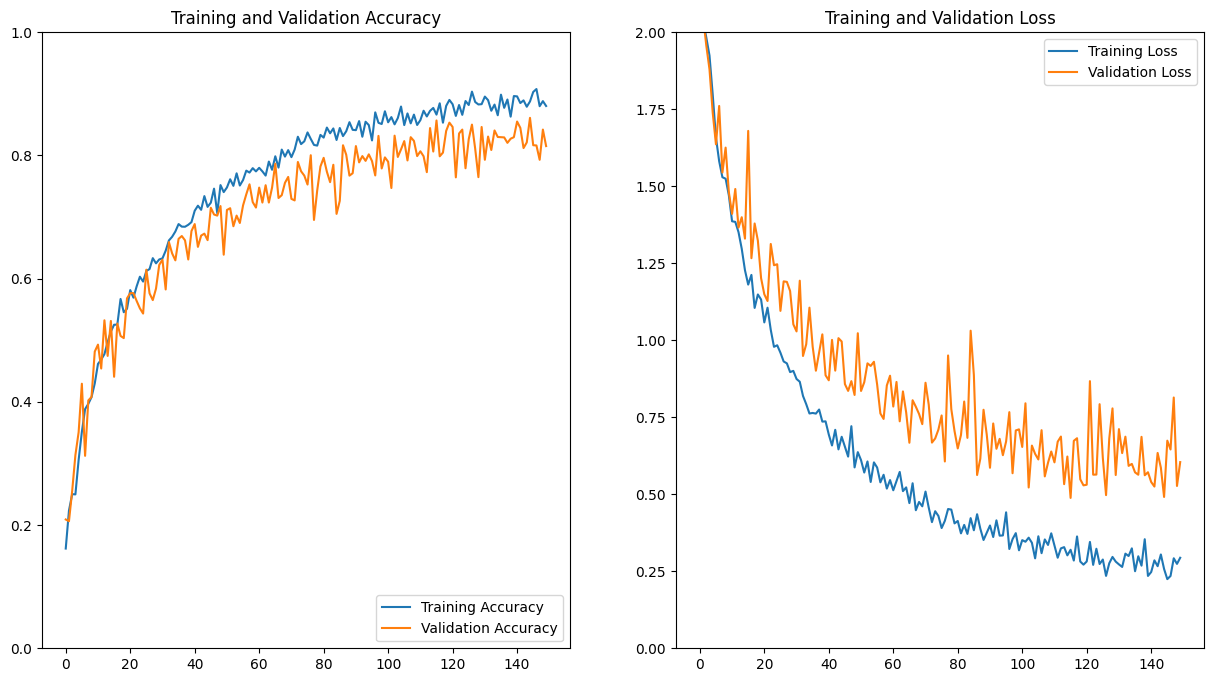

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim((0, 1))
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylim((0, 2))
plt.title('Training and Validation Loss')
plt.show()

In [82]:
loss, accuracy = model.evaluate(VAL_GENERATOR)
print('Accuracy on test dataset:', accuracy)

89/89 [==============================] - 2s 26ms/step - loss: 0.6045 - accuracy: 0.8152
Accuracy on test dataset: 0.8152327537536621


In [83]:
VAL_GENERATOR.classes

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int32)

In [84]:
X = []
y = []
for idx, k in enumerate(val_ds.as_numpy_iterator()):
    X.append(k[0])
    y.extend(k[1])

X = np.concatenate(X)

In [85]:
from sklearn import metrics
pred = model.predict(X)
pred = np.argmax(pred ,axis=-1)
report = metrics.classification_report(y, pred)
print(report)

2023-01-20 12:27:53.278701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


89/89 [==============================] - 3s 27ms/step
              precision    recall  f1-score   support

           0       0.97      0.66      0.79       468
           1       0.82      0.94      0.88       220
           2       0.89      0.78      0.83       276
           3       0.77      0.86      0.81       252
           4       0.68      0.84      0.75        96
           5       0.86      0.80      0.83       508
           6       0.66      0.80      0.72       200
           7       0.89      0.73      0.80       232
           8       0.60      0.88      0.71       216
           9       0.82      0.93      0.87       152
          10       0.82      0.93      0.87       108
          11       0.91      0.90      0.90       108

    accuracy                           0.81      2836
   macro avg       0.81      0.84      0.81      2836
weighted avg       0.83      0.81      0.81      2836



In [797]:
# model.save("32-3conv_64-3conv_64-3-64-3conv_256-dense")

In [794]:
# m = tf.keras.models.load_model(  "32-3conv_64-3conv_64-3-64-3conv_256-dense")

In [ ]:
import json
with open("class_indices.json", "w") as wr:
    json.dump(TRAIN_GENERATOR.class_indices, wr, indent=4, ensure_ascii=False)

In [10]:
desc = """
Fagus sylvatica - Diffuse-porous hardwood - Boundaries of growth rings and wood rays are visible to the naked eyes
Juglans regia - Semi-diffuse-porous hardwood - Growth rings are often visible to the naked eyes
Castanea sativa - Ring-porous hardwood - Growth rings are quite visible to the naked eyes
Quercus cerris - Ring-porous hardwood - Wide and quite visible wood rays
Alnus glutinosa - Diffuse-porous hardwood - Wide and little visible wood rays. Blurred growth rings
Fraxinus ornus - Ring-porous hardwood - Growth rings are often visible to the naked eyes
Picea abies - Softwood - Blurred boundaries of earlywood and latewood
Pinus sylvestris - Softwood - Resin canals are visible to the naked eyes. Abrupt transition from the earlywood to the latewood
Ailanthus altissima - Ring-porous hardwood - Large porous in the earlywood and large rays
Robinia pseudoacacia - Ring-porous hardwood Visible wood rays to the naked eyes strong presence of growth rings
Cupressus sempervirens - Softwood - Discontinuous growth rings and unclear limits earlywood and latewood
Platanus orientalis - Diffuse-porous hardwood - Wide and visible wood rays and quite visible growth rings
"""

In [19]:
desc_elements = [k for k in desc.split("\n") if k]
info_dc = {}
for idx, i in enumerate(desc_elements):
    val = i.split(" - ")
    key = ["name", "type", "desc"]
    dc = dict(zip(key, val))
    dc = {str(idx + 1): dc}
    info_dc.update(dc)

In [20]:
import json
with open("wood_info.json", "w") as wr:
    json.dump(info_dc, wr, indent=4, ensure_ascii=False)

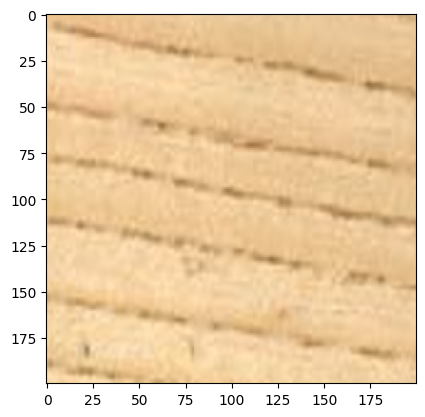

In [36]:
from PIL import Image
target_path = "/Users/berkayg/Codes/image-classification/woods_dataset/external_sample/004H.jpeg"
im = Image.open(target_path)
width, height = im.size
 
# Setting the points for cropped image
left = 4
top = height / 5
right = 154
bottom = 3 * height / 5
 
# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))
newsize = (200, 200)
im1 = im1.resize(newsize)
from matplotlib import pyplot as plt
plt.imshow(im1)
im1.save("woods_dataset/external_sample/dnm1.jpeg")

In [111]:
z = plt.imread("/Users/berkayg/Codes/image-classification/woods_dataset/external_sample/keladam.jpeg").reshape(1, 200, 200, 3) / 255

In [114]:
model.predict(z).round(3)

1/1 [==============================] - 0s 15ms/step


array([[0.   , 1.   , 0.   , 0.   , 0.   , 1.   , 0.857, 0.   , 0.   ,
        0.   , 1.   , 0.   ]], dtype=float32)

In [97]:
y

[8,
 1,
 0,
 2,
 3,
 8,
 8,
 3,
 3,
 1,
 7,
 7,
 6,
 11,
 0,
 0,
 1,
 8,
 6,
 4,
 0,
 5,
 1,
 6,
 2,
 2,
 3,
 0,
 9,
 10,
 0,
 8,
 9,
 9,
 8,
 8,
 0,
 2,
 2,
 6,
 5,
 11,
 3,
 4,
 11,
 5,
 1,
 9,
 0,
 7,
 1,
 0,
 8,
 5,
 0,
 8,
 0,
 9,
 0,
 11,
 6,
 5,
 5,
 0,
 2,
 11,
 9,
 7,
 8,
 1,
 0,
 4,
 5,
 10,
 8,
 3,
 10,
 4,
 6,
 5,
 5,
 9,
 3,
 2,
 6,
 2,
 5,
 10,
 5,
 2,
 0,
 1,
 0,
 9,
 5,
 5,
 5,
 1,
 3,
 7,
 3,
 5,
 7,
 9,
 2,
 5,
 8,
 6,
 0,
 0,
 11,
 0,
 0,
 9,
 2,
 0,
 5,
 3,
 5,
 6,
 6,
 0,
 0,
 7,
 5,
 0,
 0,
 2,
 3,
 5,
 1,
 7,
 7,
 5,
 11,
 8,
 8,
 6,
 0,
 5,
 3,
 4,
 7,
 1,
 5,
 5,
 0,
 8,
 5,
 3,
 3,
 0,
 5,
 10,
 5,
 1,
 9,
 7,
 0,
 5,
 6,
 2,
 1,
 3,
 10,
 8,
 7,
 7,
 10,
 2,
 6,
 9,
 7,
 2,
 2,
 8,
 6,
 6,
 10,
 8,
 5,
 9,
 2,
 5,
 7,
 1,
 4,
 0,
 6,
 0,
 0,
 1,
 5,
 7,
 6,
 2,
 7,
 5,
 3,
 1,
 3,
 5,
 4,
 0,
 1,
 0,
 1,
 4,
 3,
 1,
 2,
 5,
 1,
 2,
 5,
 3,
 5,
 10,
 0,
 6,
 1,
 7,
 0,
 9,
 1,
 2,
 5,
 7,
 1,
 5,
 8,
 11,
 3,
 9,
 2,
 2,
 1,
 9,
 3,
 11,
 10,
 1,
 11,
 2,
 5,
